In [3]:
%pip install librosa

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
filename = 'static1_1709474892094955561.wav'

In [6]:
import IPython.display as ipd
import librosa
import librosa.display

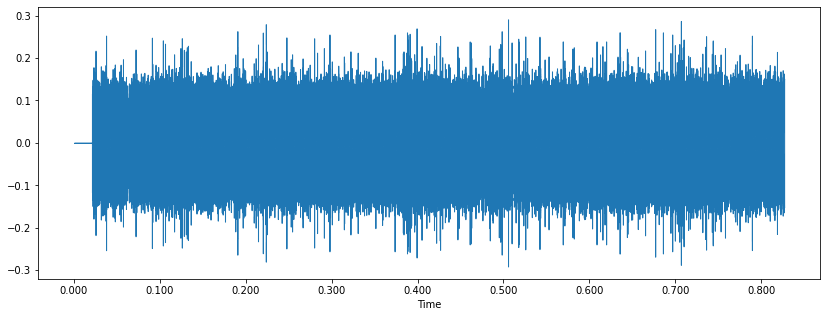

In [7]:
##olivia static sound
plt.figure(figsize=(14,5))
data, sr = librosa.load(filename)
librosa.display.waveshow(data, sr=192000) ## set to the 192kHz Dr. Tan mentioned
ipd.Audio(filename)

In [8]:
### reading with scipy for two channels w/out normalization
audio_file_path = 'static1_1709474892094955561.wav'
from scipy.io  import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.


In [9]:
wave_audio  ##no need to worry about the two channels being normalized, one channel has no info 

array([   0,   -1,    2, ...,  492, -475, 1253], dtype=int16)

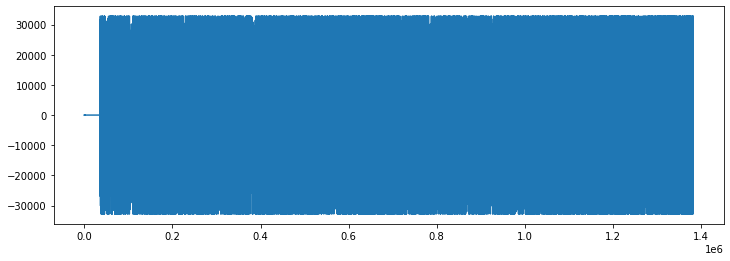

In [10]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,4))
plt.plot(wave_audio)

#I'm assuming the  graph looks slightly more different because of the sample_rate changes

In [11]:
import pandas as pd
metadata = pd.read_csv('wav_folder/20k-16k data - Sheet1.csv')
metadata.head(10)

,slice file name,classID,class
0,static1_1709474892094955561.wav,1,static
1,static2_5168535091380376068.wav,1,static
2,static3_629061623454576212.wav,1,static
3,static4_4655223395091859780.wav,1,static
4,static5_6630346508114139405.wav,1,static
5,circle1_663940077963556024.wav,2,circle
6,circle2_8711738402602823380.wav,2,circle
7,circle3_5098496031049745608.wav,2,circle
8,circle4_4782666239772476026.wav,2,circle
9,circle5_6450377546190395184.wav,2,circle


In [12]:
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=192000, n_mfcc=40)
print(mfccs.shape)
#array of dimensions

(40, 311)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)


In [13]:
mfccs

array([[-1.0303724e+03, -1.0303724e+03, -1.0303724e+03, ...,
        -3.1261990e+02, -3.1138245e+02, -3.3620157e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.1717823e+02, -1.1595310e+02, -1.1352348e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -5.5799728e+01, -5.4344719e+01, -5.0147247e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         3.1735516e+00, -5.1696825e+00, -4.9796815e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         7.8963661e+00,  4.9933672e-01, -2.0308211e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         9.0121727e+00,  2.8356037e+00,  3.0505781e+00]], dtype=float32)

In [14]:
###extracting MFCC  for every audio file 
import pandas as pd 
import os 
import librosa 

audio_dataset_path='wav_folder/'
metadata=pd.read_csv('wav_folder/20k-16k data - Sheet1.csv')
metadata.head(5)

,slice file name,classID,class
0,static1_1709474892094955561.wav,1,static
1,static2_5168535091380376068.wav,1,static
2,static3_629061623454576212.wav,1,static
3,static4_4655223395091859780.wav,1,static
4,static5_6630346508114139405.wav,1,static


In [15]:
def feature_extractor(file):
    audio, sample_rate = librosa.load(file_name, sr=192000, res_type ='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=192000, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs.T, axis=0)
    
    return mfccs_scaled_features

In [17]:
import numpy as np 
from tqdm import tqdm

extracted_features=[]
for index_num, row in tqdm(metadata.iterrows()): 
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold'+str(row["classID"]) + '/', str(row["slice file name"]))
    final_class_labels = row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
1it [00:00,  3.59it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
2it [00:00,  5.34it/s]/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  return f(*args, **kwargs)
3it [00:00,  6.25it/

In [18]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-331.68176, -108.406525, -51.249817, -14.4152...",static
1,"[-331.68176, -108.406525, -51.249817, -14.4152...",static
2,"[-331.68176, -108.406525, -51.249817, -14.4152...",static
3,"[-331.68176, -108.406525, -51.249817, -14.4152...",static
4,"[-331.68176, -108.406525, -51.249817, -14.4152...",static


In [19]:
### Splitting the dataset into independent and dependent dataset
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [20]:
##number of records, n_mfccs
X.shape

(35, 40)

In [21]:
##Label encoding
y=np.array(pd.get_dummies(y))

In [22]:
# shows the number of recordings, different classes
y.shape

(35, 7)

In [23]:
### train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [24]:
X_train

array([[-331.68176  , -108.406525 ,  -51.249817 , ...,    4.198207 ,
          -1.5589985,    0.413034 ],
       [-331.68176  , -108.406525 ,  -51.249817 , ...,    4.198207 ,
          -1.5589985,    0.413034 ],
       [-331.68176  , -108.406525 ,  -51.249817 , ...,    4.198207 ,
          -1.5589985,    0.413034 ],
       ...,
       [-331.68176  , -108.406525 ,  -51.249817 , ...,    4.198207 ,
          -1.5589985,    0.413034 ],
       [-331.68176  , -108.406525 ,  -51.249817 , ...,    4.198207 ,
          -1.5589985,    0.413034 ],
       [-331.68176  , -108.406525 ,  -51.249817 , ...,    4.198207 ,
          -1.5589985,    0.413034 ]], dtype=float32)

In [25]:
y

array([[0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0,

In [ ]:
X_train.shape

(24, 40)

In [ ]:
X_test.shape

(6, 40)

In [ ]:
y_train.shape

(24, 3)

In [ ]:
y_test.shape

(6, 3)

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.1


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten 
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [33]:
## number of classes
num_labels = y.shape[1]

In [34]:
##creating an ANN with three layers
model=Sequential()

##first layer 
model.add(Dense(100,input_shape=(40,)))     #first layer has 100 neurons, with an input shape of 40 because training had 40 features
model.add(Activation('relu'))
model.add(Dropout(0.01))

##second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.01))

##third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.01))

##final layer
model.add(Dense(num_labels))    #nothing but number of classes 
model.add(Activation('relu'))    #softmax bc its a multiclass classification

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4100      
                                                                 
 activation_3 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               20200     
                                                                 
 activation_4 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_5 (Dense)             (None, 100)              

In [36]:
import keras
optimizer=keras.optimizers.Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam'(lr=0.01))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)

In [39]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 7
num_batch_size = 2

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/7
 1/14 [=>............................] - ETA: 0s - loss: 8.0590 - accuracy: 0.5000
Epoch 1: val_loss improved from inf to 16.11810, saving model to saved_models/audio_classification.hdf5
14/14 [==============================] - 0s 7ms/step - loss: 13.2399 - accuracy: 0.1786 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 2/7
 1/14 [=>............................] - ETA: 0s - loss: 8.0590 - accuracy: 0.5000
Epoch 2: val_loss did not improve from 16.11810
14/14 [==============================] - 0s 4ms/step - loss: 13.2399 - accuracy: 0.1786 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 3/7
 1/14 [=>............................] - ETA: 0s - loss: 16.1181 - accuracy: 0.0000e+00
Epoch 3: val_loss did not improve from 16.11810
14/14 [==============================] - 0s 4ms/step - loss: 13.2399 - accuracy: 0.1786 - val_loss: 16.1181 - val_accuracy: 0.0000e+00
Epoch 4/7
 1/14 [=>............................] - ETA: 0s - loss: 16.1181 - accuracy: 0.0000e+00
Epoch 4: val_

In [40]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])


0.0


In [ ]:
print("slight change")

slight change
